<a href="https://colab.research.google.com/github/1eetnals/Mary-s-Hospital-AI-center/blob/main/script_roisignal_v20210714_orig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import image
from nilearn import signal
import os

In [ ]:
n=5

In [ ]:
path0 = '/nfs/jjh_HUFS/rs_glymphatic/AD_amy_pos'
#path0 = '/Volumes/nyh/jjh/csfflow/CN'
sdir = os.listdir(path0)
print(sdir)
os.chdir('/nfs/jjh_HUFS/rs_glymphatic/AD_amy_pos')

['sub_0072_4', '@eaDir', 'sub_0182_3', 'sub_0209_2', 'sub_0250', 'sub_0291', 'sub_0291_3', 'sub_0314_1', 'sub_0365_1', 'sub_0384_1', 'sub_0398_2', 'sub_0402', 'sub_0412_1', 'sub_0422_3', 'sub_0473_2', 'sub_0483_2', 'sub_0486', 'sub_0499', 'sub_0514_2', 'sub_0605_2', 'sub_0723_2', 'sub_0725_3', 'sub_0856', 'sub_0881', 'sub_0915', 'sub_0936', 'sub_0975', 'sub_1021', 'sub_1031', 'sub_1074', 'sub_1075', 'sub_1123', 'sub_1124', 'sub_1247', 'sub_1281', 'sub_1304', 'sub_1314', 'sub_1332', 'sub_1336', 'sub_1370', 'sub_1487', 'sub_1553', 'sub_1731', 'sub_1821', 'sub_1851', 'sub_1860', 'sub_1902', 'sub_1909', 'sub_1917', 'sub_1922', 'sub_1971', 'sub_1992', 'sub_2026', 'sub_2038', 'sub_2195', 'sub_2204', 'sub_2219', 'sub_2221', 'sub_2232', 'sub_2246', 'sub_2263', 'sub_2273', 'sub_2295', 'sub_2312', 'sub_2328_2', '.DS_Store', 'sub_2232.gz', 'sub_2313']


In [ ]:
fmri = nib.load(path0+'/'+sdir[n]+'/'+'rsfmri.nii.gz')
mask = nib.load(path0+'/'+sdir[n]+'/'+'re4.nii.gz')


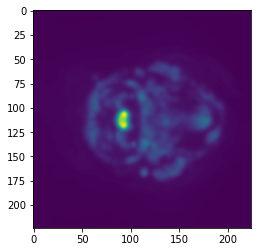

In [ ]:
fmri_smt05 = image.smooth_img(fmri,5)
fmrimg = fmri_smt05.get_fdata()
fmrimg.shape
sz = fmrimg.shape
ts = fmri.header['pixdim'][3]
maskimg = mask.get_fdata()
maskimg.shape
plt.imshow(fmrimg[:,:,1,0])
plt.show()

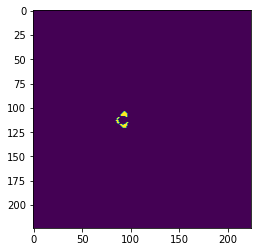

In [ ]:
plt.imshow(maskimg[:,:,1])
plt.show()

In [ ]:
zz=np.zeros((6,sz[2]))
zz[1,:] = np.squeeze(np.sum(np.sum(maskimg==1,axis = 1),axis = 0))
zz[2,:] = np.squeeze(np.sum(np.sum(maskimg==2,axis = 1),axis = 0))
zz[4,:] = np.squeeze(np.sum(np.sum(maskimg==4,axis = 1),axis = 0))
zz[5,:] = np.squeeze(np.sum(np.sum(maskimg==5,axis = 1),axis = 0))
print(zz.shape)

(6, 75)


In [ ]:
rz = 1
smax = np.max(fmrimg[:,:,:,0])
rois_sig01 = np.zeros((sum(zz[rz,:]>0),sz[3]))
cn = 0
for z in range(0,sz[2]):
    if zz[rz,z]>0:
        fmrimg_r = np.reshape(fmrimg[:,:,z,:],(sz[0]*sz[1],sz[3]))
        maskimg_r = np.reshape(maskimg[:,:,z],(sz[0]*sz[1],1))
        roi_ind = np.where(maskimg_r==rz)[0]
        roi_sig = fmrimg_r[roi_ind,:]
        roi_sig_clean = signal.clean(np.transpose(roi_sig,(1,0)),detrend=True, standardize=False, confounds=None, standardize_confounds=True,  low_pass=0.1, high_pass=None, t_r = ts, ensure_finite=False)
        rois_sig01[cn,:] = np.mean(roi_sig_clean,axis=1)
        if len(roi_sig)>0:
            xx = np.arange(0,ts*sz[-1],ts)
            plt.plot(xx,np.mean(roi_sig_clean,axis=1))
#            plt.ylim([ymin, ymax])
            plt.xlabel('sec')
            plt.ylabel('signal intensity')
            plt.title(f'slice: #{z}')
            plt.show()
        cn = cn+1

In [ ]:
rz = 2
smax = np.max(fmrimg[:,:,:,0])
rois_sig02 = np.zeros((sum(zz[rz,:]>0),sz[3]))
cn = 0
for z in range(0,sz[2]):
    if zz[rz,z]>0:
        fmrimg_r = np.reshape(fmrimg[:,:,z,:],(sz[0]*sz[1],sz[3]))
        maskimg_r = np.reshape(maskimg[:,:,z],(sz[0]*sz[1],1))
        roi_ind = np.where(maskimg_r==rz)[0]
        roi_sig = fmrimg_r[roi_ind,:]
        roi_sig_clean = signal.clean(np.transpose(roi_sig,(1,0)),detrend=True, standardize=False, confounds=None, standardize_confounds=True,  low_pass=0.1, high_pass=None, t_r = ts, ensure_finite=False)
        rois_sig02[cn,:] = np.mean(roi_sig_clean,axis=1)
        if len(roi_sig)>0:
            xx = np.arange(0,ts*sz[-1],ts)
            plt.plot(xx,np.mean(roi_sig_clean,axis=1))
#            plt.ylim([ymin, ymax])
            plt.xlabel('sec')
            plt.ylabel('signal intensity')
            plt.title(f'slice: #{z}')
            plt.show()
        cn = cn+1

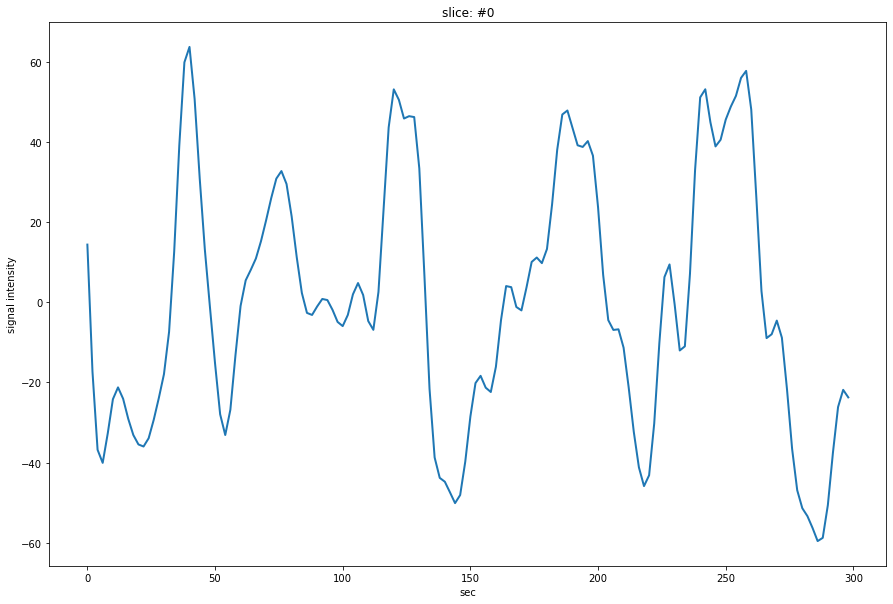

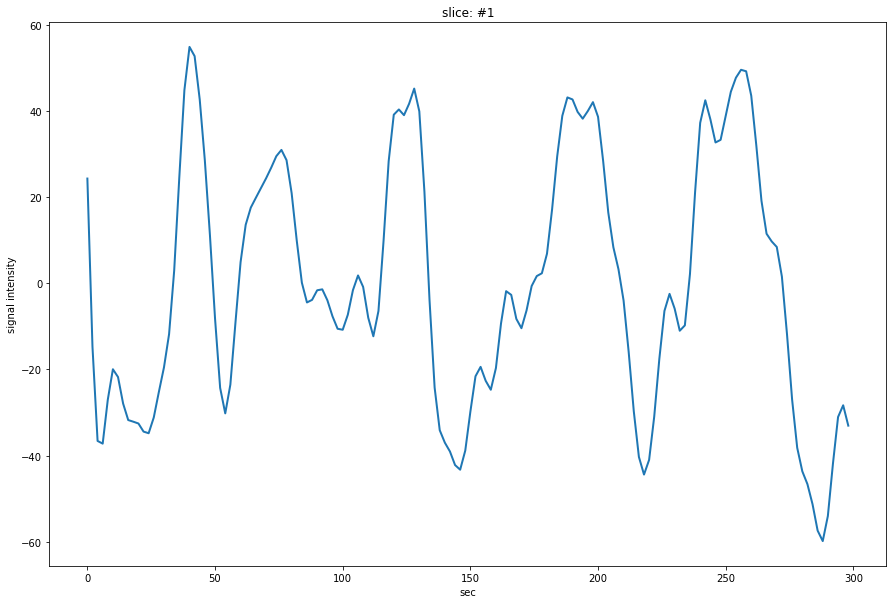

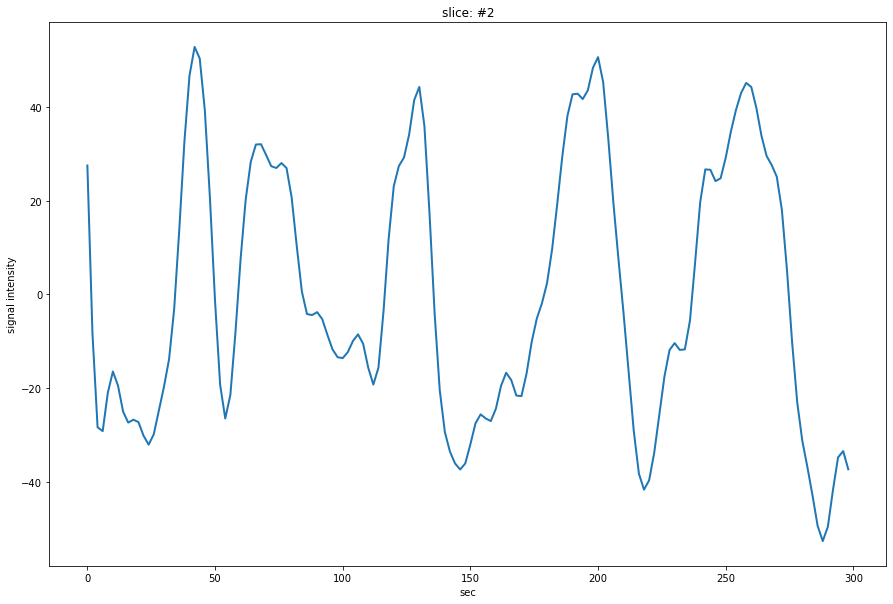

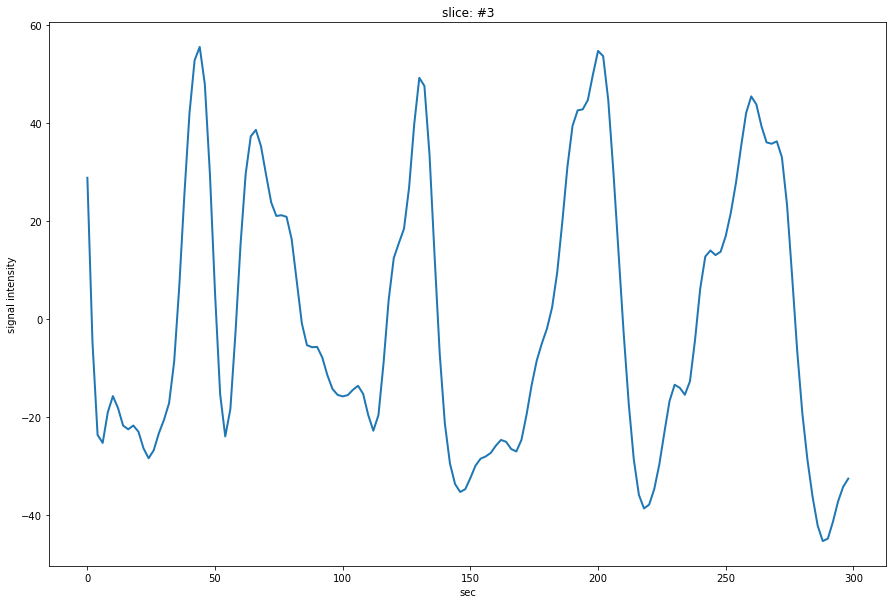

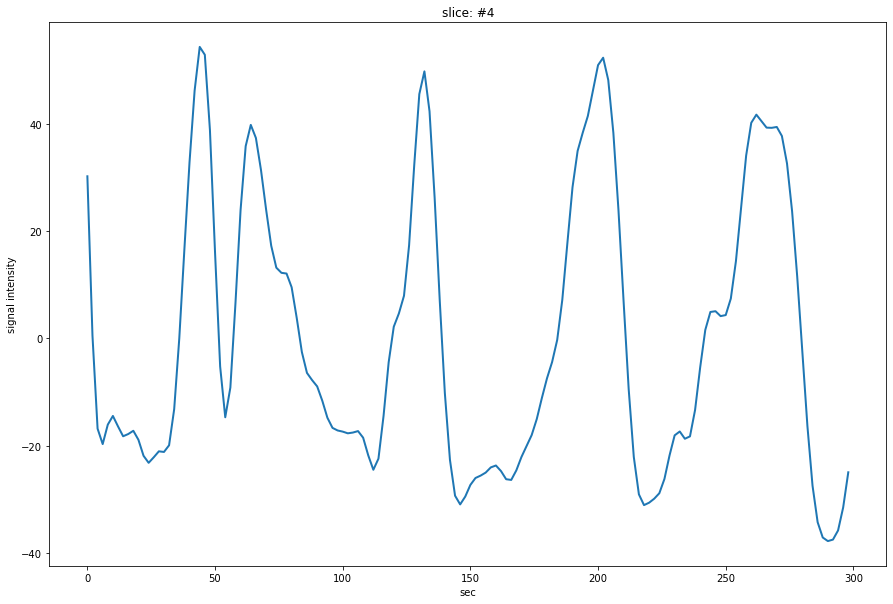

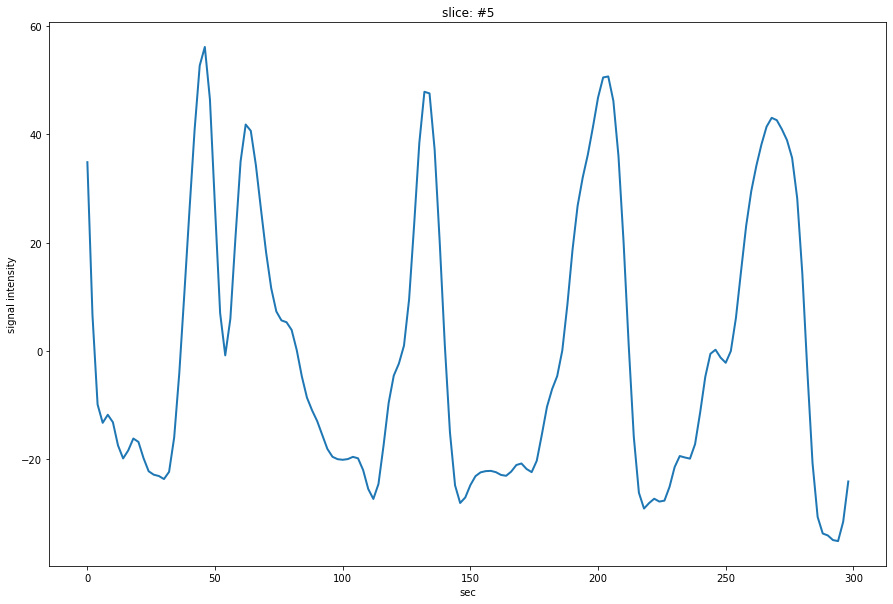

In [ ]:
rz = 4
smax = np.max(fmrimg[:,:,:,0])
rois_sig04 = np.zeros((sum(zz[rz,:]>0),sz[3]))
cn = 0
for z in range(0,sz[2]):
    if zz[rz,z]>0:
        fmrimg_r = np.reshape(fmrimg[:,:,z,:],(sz[0]*sz[1],sz[3]))
        maskimg_r = np.reshape(maskimg[:,:,z],(sz[0]*sz[1],1))
        roi_ind = np.where(maskimg_r==rz)[0]
        roi_sig = fmrimg_r[roi_ind,:]
        roi_sig_clean = signal.clean(np.transpose(roi_sig,(1,0)),detrend=True, standardize=False, confounds=None, standardize_confounds=True,  low_pass=0.1, high_pass=None, t_r = ts, ensure_finite=False)
        rois_sig04[cn,:] = np.mean(roi_sig_clean,axis=1)
        if len(roi_sig)>0:
            xx = np.arange(0,ts*sz[-1],ts)
            plt.plot(xx,np.mean(roi_sig_clean,axis=1))
#            plt.ylim([ymin, ymax])
            plt.xlabel('sec')
            plt.ylabel('signal intensity')
            plt.title(f'slice: #{z}')
            plt.show()
        cn = cn+1

In [ ]:
rz = 5
smax = np.max(fmrimg[:,:,:,0])
rois_sig05 = np.zeros((sum(zz[rz,:]>0),sz[3]))
cn = 0
for z in range(0,sz[2]):
    if zz[rz,z]>0:
        fmrimg_r = np.reshape(fmrimg[:,:,z,:],(sz[0]*sz[1],sz[3]))
        maskimg_r = np.reshape(maskimg[:,:,z],(sz[0]*sz[1],1))
        roi_ind = np.where(maskimg_r==rz)[0]
        roi_sig = fmrimg_r[roi_ind,:]
        roi_sig_clean = signal.clean(np.transpose(roi_sig,(1,0)),detrend=True, standardize=False, confounds=None, standardize_confounds=True,  low_pass=0.1, high_pass=None, t_r = ts, ensure_finite=False)
        rois_sig05[cn,:] = np.mean(roi_sig_clean,axis=1)
        if len(roi_sig)>0:
            xx = np.arange(0,ts*sz[-1],ts)
            plt.plot(xx,np.mean(roi_sig_clean,axis=1))
#            plt.ylim([ymin, ymax])
            plt.xlabel('sec')
            plt.ylabel('signal intensity')
            plt.title(f'slice: #{z}')
            plt.show()
        cn = cn + 1


In [ ]:
rois_sig_clean = np.zeros((6,sz[3]))
fmrimg_r = np.reshape(fmrimg,(sz[0]*sz[1]*sz[2],sz[3]))
maskimg_r = np.reshape(maskimg,(sz[0]*sz[1]*sz[2],1))
plt.rcParams["figure.figsize"]=(15,10)
plt.rcParams["lines.linewidth"]=2

i=1
for rz in [1,2,4,5]:
    roi_ind = np.where(maskimg_r==rz)[0]
    roi_sig = fmrimg_r[roi_ind,:]
    roi_sig_clean = signal.clean(np.transpose(roi_sig,(1,0)), detrend=True, standardize=False, confounds=None, standardize_confounds=True, low_pass=0.1, high_pass=None, t_r=ts, ensure_finite=False)
    rois_sig_clean[rz,:] = np.mean(roi_sig_clean, axis=1)
    plt.subplot(2,2,i)
    plt.plot(np.mean(roi_sig_clean, axis=1))
    plt.xlabel('sec')
    plt.ylabel('signal intensity')
    plt.title(f'roi #{rz}',fontweight='bold')
    plt
    i+=1

plt.tight_layout()

plt.savefig(os.path.join(os.getcwd(),sdir[n],"roi_mean_signal_v1.png"))
plt.clf()
print(f"{sdir[n]}:complete")

In [ ]:
np.savez(path0+'/'+sdir[n]+'/'+'roisig.npz',roi1=rois_sig01, roi2=rois_sig02, roi4=rois_sig04, roi5=rois_sig05, roi_all=rois_sig_clean)